# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [187]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [188]:
# Read the Mapbox API key
load_dotenv("API.env")
map_box_api = os.getenv("Mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [189]:
# Import the necessary CSVs to Pandas DataFra
Average_Housing_Units_Per_Year = pd.read_csv('Average Housing Units Per Year.csv',index_col = 'year')
Average_Housing_Cost_Per_Year = pd.read_csv('Average Housing Cost Per Year.csv', index_col = 'year')
Average_Prices_by_Neighborhood = pd.read_csv('Average Prices by Neighborhood.csv')
Top_10_Most_Expensive_Neighborhoods = pd.read_csv('Top 10 Most Expensive Neighborhoods.csv', index_col = 'Neighborhood')
Neighborhood_Map_Data = pd.read_csv("Neighborhood Map Data.csv", index_col = 'Neighborhood')

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [199]:
def housing_units_per_year():
    housing_units_plot = Average_Housing_Units_Per_Year.plot(kind='bar',
                                             ylim = (370000,385000),
                                             title = "Annual Average Number of Housing Units in San Francisco",
                                             xlabel = "Year", 
                                             ylabel = "Average Number of Units",
                                            )
    
    return housing_units_plot

In [221]:
def average_gross_rent():
    avg_gross_rent_plot =  Average_Housing_Cost_Per_Year.plot(kind='line', 
                                               color="orange", 
                                               title = "Average Gross Rent", 
                                               figsize=(15,3),
                                               ylabel = "Year",
                                               y='Gross Rent'
                                                          
                                              )
    return avg_gross_rent_plot
  

In [222]:
def average_sales_price():
    avg_sales_price = Average_Housing_Cost_Per_Year.plot(kind='line', 
                                               color="orange", 
                                               title = "Average Sales Price Per Year", 
                                               figsize=(15,3),
                                               y='Sale Price Per SqFT',              
                                               xlabel = "Year"
                                              )
    
    return avg_sales_price

In [223]:
def average_price_by_neighborhood():
    avg_price_neighborhood = Average_Prices_by_Neighborhood.hvplot.line(x='year', 
                                                         xlabel="Year", 
                                                         y="Sale Price Per SqFT",
                                                         ylabel = "Sale Price per Sq Ft", 
                                                         groupby='Neighborhood',
                                                         yformatter = '$%.2f',
                                                         title = "Average Sales Price Per Year",
                                                        )
    
    return avg_price_neighborhood

In [224]:
def average_grossrent_price_by_neighborhood():
    avg_grossrent_price_by_neighborhood = Average_Prices_by_Neighborhood.hvplot.line(x='year', 
                                                         xlabel="Year", 
                                                         y="Gross Rent",
                                                         ylabel = "Gross Rent", 
                                                         groupby='Neighborhood',
                                                         yformatter = '$%.2f',
                                                         title = "Average Gress Rent Per Year",
                                                        )
    
    return avg_pgrossrent_price_by_neighborhood

In [225]:
def top_most_expensive_neighborhoods():
    top_exp_neighborhood = Top_10_Most_Expensive_Neighborhoods.hvplot.bar(rot=90, 
                                            ylim = (600,950),
                                            y="Sale Price Per SqFT",
                                            x="Neighborhood",
                                            xlabel="Neighborhood", 
                                            ylabel="Sale Price Per Sq. Ft", 
                                            title = "Top 10 Most Expensive Neighborhoods", 
                                            yformatter = '$%.2f'
                                           )

    return top_exp_neighborhood

In [226]:
def most_expensive_neighborhoods_rent_sales():
    most_exp_nbd = Average_Prices_by_Neighborhood.hvplot.bar(
                                          groupby='Neighborhood', 
                                          rot=90,
                                          yformatter = '$%.2f',
                                          ylabel = 'Price',
                                          xlabel = 'Year'
                                         )  
    
    return most_exp_nbd

In [227]:
def neighborhood_map():
    map_plot = px.scatter_mapbox(
    Neighborhood_Map_Data,
    lat="Lat",
    lon="Lon",
    size="Sale Price Per SqFT",
    color="Gross Rent",
    color_continuous_scale='delta',
    zoom=11,
    hover_name=Neighborhood_Map_Data.index
)

    return map_plot

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Row
        [0] Column
            [0] Markdown(str)
            [1] Str(AxesSubplot)
            [2] Str(AxesSubplot)
            [3] Str(AxesSubplot)
    [2] Row
        [0] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [2] HoloViews(Bars)
            [3] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()

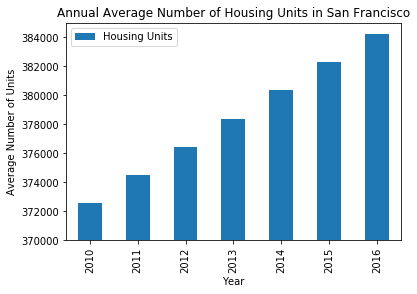

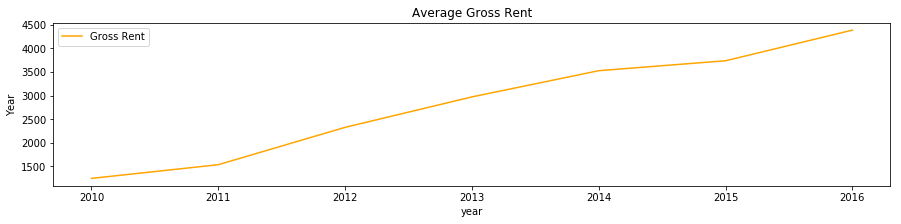

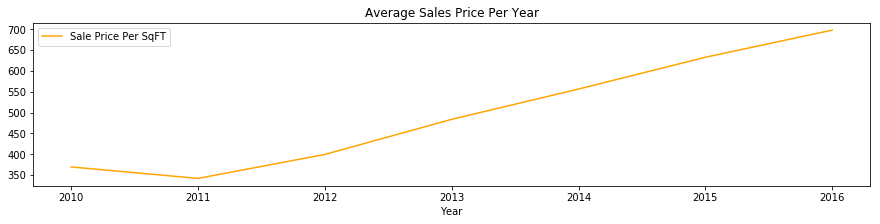

In [229]:
# Create a Title for the Dashboard
title = "San Francisco Housing Market Analysis"


# Create a tab layout for the dashboard
By_Neighborhood_data = pn.Column('By Neighborhood',average_price_by_neighborhood(), top_most_expensive_neighborhoods(), most_expensive_neighborhoods_rent_sales())
Total_SF_Data = pn.Column("Total San Francisco", housing_units_per_year(), average_gross_rent(), average_sales_price())
Map = pn.Column('Map' , neighborhood_map())
By_Neighborhood = pn.Row(By_Neighborhood_data)
Total_SF = pn.Row(Total_SF_Data)

# Create the dashboard
tabs = pn.Tabs(('Welcome',Map),('Yearly Market Analysis',Total_SF),('Neighborhood Analysis',By_Neighborhood))
tabs

## Serve the Panel Dashboard

In [230]:
# Serve the# dashboard
tabs.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Row
        [0] Column
            [0] Markdown(str)
            [1] Str(AxesSubplot)
            [2] Str(AxesSubplot)
            [3] Str(AxesSubplot)
    [2] Row
        [0] Column
            [0] Markdown(str)
            [1] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [2] HoloViews(Bars)
            [3] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

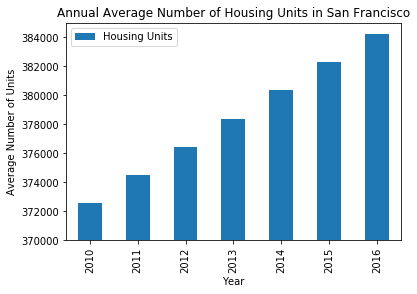

In [231]:
housing_units_per_year()

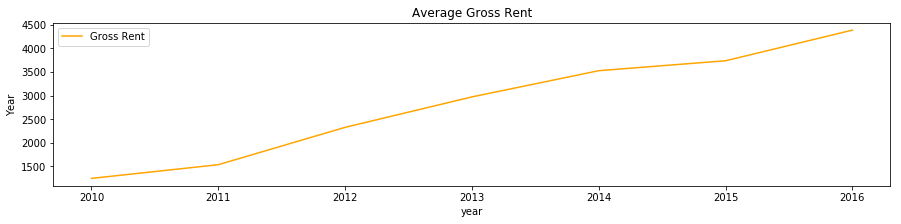

In [232]:
average_gross_rent()

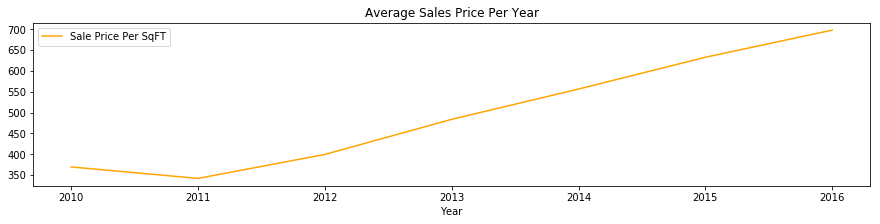

In [233]:
average_sales_price()

In [234]:
average_price_by_neighborhood()

:DynamicMap   [Neighborhood]
   :Curve   [year]   (Sale Price Per SqFT)

In [235]:
top_most_expensive_neighborhoods()

:Bars   [Neighborhood]   (Sale Price Per SqFT)

In [236]:
most_expensive_neighborhoods_rent_sales()

:DynamicMap   [Neighborhood]
   :Bars   [index,Variable]   (value)

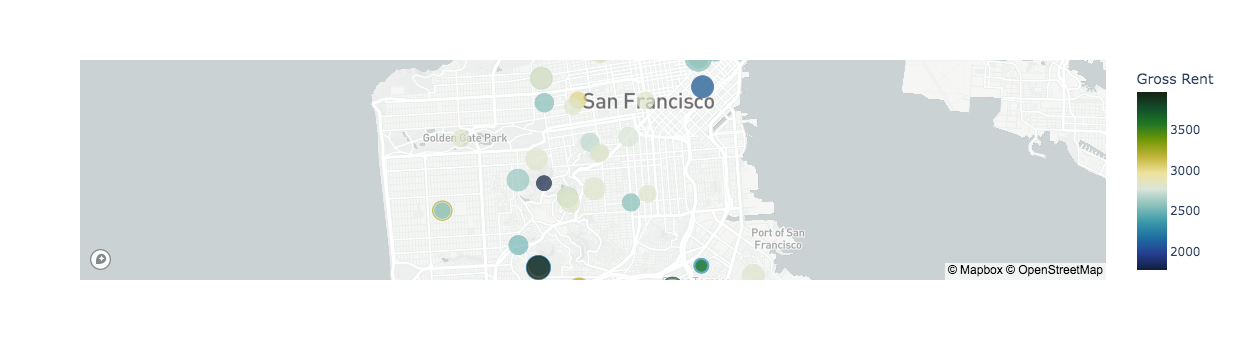

In [237]:
neighborhood_map().show()